In [177]:
!pip install xgboost

In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import xgboost as xgb

In [179]:
data = pd.read_csv("/Users/vitoriawillanidealmeida/Desktop/DATA SCIENCE/Projetos próprios/Car_sales_canada/Canadasalesdata.csv")
data

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Sumofsales,Category,Year
0,Acura MDX,93,389,782,611,550,501,0,0,0,0,0,0,2926,MLS,2021
1,Audi Q7,210,210,236,303,292,303,0,0,0,0,0,0,1554,MLS,2021
2,Audi Q8,130,130,146,211,203,211,0,0,0,0,0,0,1031,MLS,2021
3,BMW X5,323,323,364,518,498,518,0,0,0,0,0,0,2544,MLS,2021
4,BMW X6,72,72,81,113,108,113,0,0,0,0,0,0,559,MLS,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Subaru Outback,499,621,948,1065,1079,981,1074,845,644,926,1184,1106,10972,MS,2019
232,Toyota 4Runner,605,393,784,762,854,681,824,903,522,690,663,549,8230,MS,2019
233,Toyota Highlander,729,792,1184,1095,1185,1423,1347,1336,1114,1366,1316,924,13811,MS,2019
234,Volkswagen Atlas,530,521,822,925,881,725,761,769,748,933,695,601,8911,MS,2019


Columns:
model: which is the car model name
Jan :January
Feb:February
Mar:March
Apr:April
May:May
Jun:June
Jul:July
Aug:August
Sep:September
Oct:October
Nov:November
Dec:December
Sumofsales : is the sum of sale of each car model
Category : Contain 5 categories of cars
MLS :MIDSIZE LUXURY SUV SALES FIGURES
SLS:SMALL LUXURY SUV SALES FIGURES
LLS: LARGE LUXURY SUV SALES FIGURES
LS:LARGE SUV SALES FIGURES
MS:MIDSIZE SUV SALES FIGURES
Year : the year of sales

In [180]:
data["Model"].unique()

array(['Acura MDX', 'Audi Q7', 'Audi Q8', 'BMW X5', 'BMW X6',
       'Cadillac XT5', 'Cadillac XT6', 'Genesis GV80', 'Infiniti QX60',
       'Jaguar F0Pace', 'Land Rover Defender',
       'Land Rover Discovery / LR4', 'Land Rover Range Rover Sport',
       'Land Rover Range Rover Velar', 'Lexus GX', 'Lexus RX',
       'Lincoln Aviator', 'Lincoln MKX/Nautilus', 'Maserati Levante',
       'Mercedes0Benz GLE0Class', 'Porsche Cayenne', 'Tesla Model X',
       'Volvo XC90', 'Alfa Romeo Stelvio', 'Audi eTron', 'Audi Q3',
       'Audi Q5', 'BMW X1', 'BMW X2', 'Cadillac XT4', 'Infiniti QX30',
       'Infiniti QX50', 'Jaguar E0Pace', 'Land Rover Discovery Sport',
       'Land Rover Range Rover Evoque', 'Lexus NX', 'Lexus UX',
       'Lincoln MKC', 'Mercedes0Benz GLA0Class',
       'Mercedes0Benz GLC/GLK0Class', 'Volvo XC40', 'Volvo XC60',
       'Infiniti QX55', 'Mercedes0Benz GLB', 'Tesla Model Y', 'BMW X7',
       'Cadillac Escalade', 'Infiniti QX80', 'Land Rover Range Rover',
       'Lexus L

Observamos na filtragem abaixo as vendas por ano

In [181]:
sales_for_Year = data.groupby("Year")[["Sumofsales"]].sum()
sales_for_Year

,Sumofsales
Year,
2019,390825
2020,341736
2021,136104


In [182]:
sales_for_model = data.groupby("Model")[["Sumofsales"]].sum().sort_values(by = "Sumofsales", ascending = False).reset_index()
sales_for_model

,Model,Sumofsales
0,Jeep Wrangler,45892
1,Toyota Highlander,42741
2,Jeep Grand Cherokee,35626
3,Audi Q5,35460
4,Hyundai Santa Fe,34650
...,...,...
84,Ford Bronco Sport,195
85,Infiniti QX55,190
86,Infiniti QX30,189
87,Volkswagen Touareg,28


<AxesSubplot:xlabel='Model'>

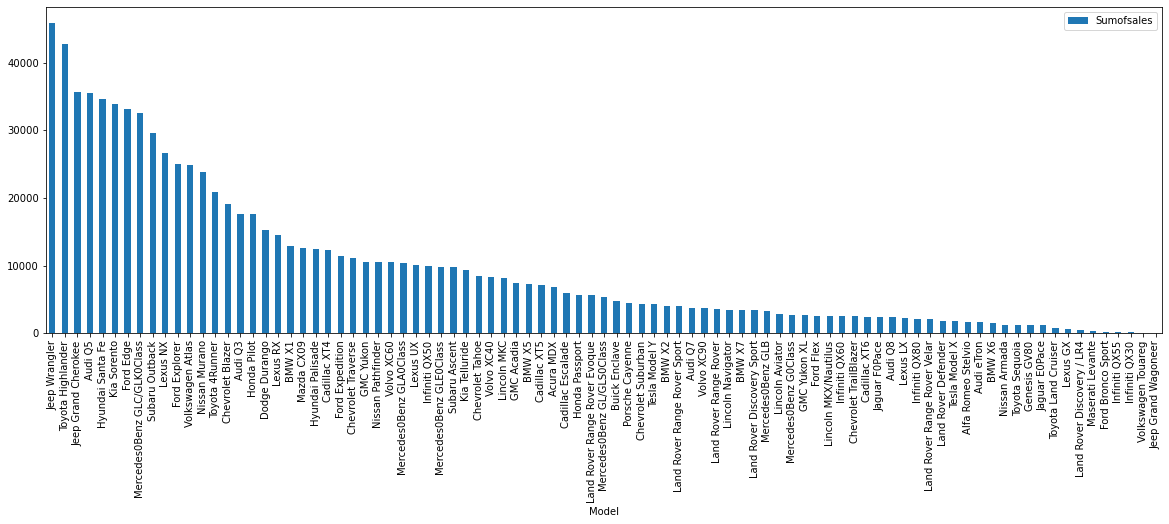

In [183]:
sales_for_model.plot(kind= "bar", x="Model", y="Sumofsales", figsize=(20,6))

Entre os 10 modelos mais vendidos, vemos que a única montadora que aparece mais de uma vez é a Jeep. Vamos analisar as vendas por montadora? Let's try

populacao_estados[populacao_estados['POPULAÇÃO'].str.contains('\(', na = False)]

In [184]:
sales_for_model[sales_for_model["Model"].str.contains('Jeep')]

,Model,Sumofsales
0,Jeep Wrangler,45892
2,Jeep Grand Cherokee,35626
88,Jeep Grand Wagoneer,4


In [185]:
Jeep_sales = 45892+35626+4
Jeep_sales

81522

Fazer isso na mão para cada montadora será muito trabalhoso, então tentei automatizar a busca pela montadoras, entretanto não tenho como reconhecer as fabricantes, só os nomes dos modelos. Por esse motivo farei a análise manual das montadoras que aparecem nas 20 primeiras colocações em número de vendas

In [186]:
palavras = sales_for_model["Model"].str.split(expand=True).stack().value_counts()
palavras


Rover            11
Land              8
Mercedes0Benz     6
Lexus             5
Ford              5
                 ..
GLA0Class         1
XC60              1
Pathfinder        1
Traverse          1
Wagoneer          1
Length: 125, dtype: int64

In [187]:
sales_for_model.head(20)

,Model,Sumofsales
0,Jeep Wrangler,45892
1,Toyota Highlander,42741
2,Jeep Grand Cherokee,35626
3,Audi Q5,35460
4,Hyundai Santa Fe,34650
5,Kia Sorento,33846
6,Ford Edge,33178
7,Mercedes0Benz GLC/GLK0Class,32555
8,Subaru Outback,29520
9,Lexus NX,26647


In [188]:
Toyota_sales = 42741+20947
Toyota_sales

63688

In [189]:
Audi_sales = 35460+17641
Audi_sales

53101

In [190]:
Hyundai_sales = 34650

In [191]:
Kia_sales = 33846

In [192]:
Ford_sales= 33178 + 24950
Ford_sales

58128

In [193]:
Volkswagen_sales = 24928

In [194]:
Nissan_sales = 23782

In [195]:
Mercedes0Benz_sales = 32555

In [196]:
Subaru_sales = 29520

In [197]:
Lexus_sales = 26647+14580
Lexus_sales

41227

In [198]:
Chevrolet_sales = 19071

In [199]:
Honda_sales = 17581

In [200]:
Dodge_sales = 15287

In [201]:
BMW_sales = 12840

In [202]:
montadoras = [Toyota_sales, BMW_sales, Ford_sales, Hyundai_sales, Kia_sales, Audi_sales, Honda_sales, Chevrolet_sales, Dodge_sales,Lexus_sales,
              Subaru_sales,Mercedes0Benz_sales, Nissan_sales, Volkswagen_sales]

In [203]:
# Dicionário para armazenar o percentual de vendas de cada montadora
percentual_montadora = {}
# Loop através da lista de montadoras
for montadora in montadoras:
    # Calcular o percentual de vendas para a montadora atual
    percentual = montadora / sales_for_model["Sumofsales"].head(20).sum()
    # Adicionar o percentual de vendas da montadora atual ao dicionário de percentuais
    percentual_montadora[montadora] = percentual

# Imprimir os percentuais de vendas para cada montadora
for montadora, percentual in percentual_montadora.items():
    print(f"Percentual de vendas para {montadora}: {percentual:.2%}")


Percentual de vendas para 63688: 11.76%
Percentual de vendas para 12840: 2.37%
Percentual de vendas para 58128: 10.73%
Percentual de vendas para 34650: 6.40%
Percentual de vendas para 33846: 6.25%
Percentual de vendas para 53101: 9.80%
Percentual de vendas para 17581: 3.25%
Percentual de vendas para 19071: 3.52%
Percentual de vendas para 15287: 2.82%
Percentual de vendas para 41227: 7.61%
Percentual de vendas para 29520: 5.45%
Percentual de vendas para 32555: 6.01%
Percentual de vendas para 23782: 4.39%
Percentual de vendas para 24928: 4.60%


In [204]:
#top 3 montadoras por percentuais de mercado
percentual_montadora = {"Toyota": 11.76, "Ford": 10.73, "Audi": 9.80}


In [205]:

# Criar o DataFrame
top3_montadoras = pd.DataFrame(percentual_montadora.items(), columns=["montadora", "percentual do mercado"])

# Exibir o DataFrame
top3_montadoras


,montadora,percentual do mercado
0,Toyota,11.76
1,Ford,10.73
2,Audi,9.80


In [206]:
top3_montadoras["vendas"] = [63688,58128,53101]

In [207]:
top3_montadoras

,montadora,percentual do mercado,vendas
0,Toyota,11.76,63688
1,Ford,10.73,58128
2,Audi,9.80,53101


No gráfico o tamanho das bolhas é dado pela porcentagem do mercado que essa montadora representa enter os 20 modelos mais vendidos

In [208]:
px.scatter(data_frame = top3_montadoras, x = 'montadora', y = 'vendas', size = 'percentual do mercado')

Vamos agora focar nossa atenção nos modelos e não mais na montadora

In [209]:
data.head(20)

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Sumofsales,Category,Year
0,Acura MDX,93,389,782,611,550,501,0,0,0,0,0,0,2926,MLS,2021
1,Audi Q7,210,210,236,303,292,303,0,0,0,0,0,0,1554,MLS,2021
2,Audi Q8,130,130,146,211,203,211,0,0,0,0,0,0,1031,MLS,2021
3,BMW X5,323,323,364,518,498,518,0,0,0,0,0,0,2544,MLS,2021
4,BMW X6,72,72,81,113,108,113,0,0,0,0,0,0,559,MLS,2021
5,Cadillac XT5,378,378,425,575,553,575,0,0,0,0,0,0,2884,MLS,2021
6,Cadillac XT6,146,146,164,175,168,175,0,0,0,0,0,0,974,MLS,2021
7,Genesis GV80,108,106,160,154,146,168,121,0,0,0,0,0,963,MLS,2021
8,Infiniti QX60,130,130,146,95,91,95,0,0,0,0,0,0,687,MLS,2021
9,Jaguar F0Pace,116,116,131,184,177,184,0,0,0,0,0,0,908,MLS,2021


vemos que os dados se referam apenas aos anos de 2019 até 2021

In [210]:
data["Year"].unique()

array([2021, 2020, 2019])

In [211]:
category_sales = data.groupby("Category")[["Sumofsales"]].sum().sort_values(by= "Sumofsales", ascending= False)
category_sales

,Sumofsales
Category,
MS,490987
SLS,156244
MLS,151396
LS,40089
LLS,29949


In [212]:
category_sales.reset_index(inplace=True)

In [213]:
category_sales

,Category,Sumofsales
0,MS,490987
1,SLS,156244
2,MLS,151396
3,LS,40089
4,LLS,29949


In [214]:
import plotly.express as px

# Assuming your DataFrame 'df' has the required columns

fig = px.sunburst(data, path=['Category', 'Model'], values='Sumofsales',
                  color='Sumofsales')
fig.show()


In [215]:

# Somar as entradas de cada coluna de Jan até Dec
data.loc[:, 'Jan':'Dec'].sum(axis=0)

Jan    60655
Feb    73490
Mar    76153
Apr    73870
May    85698
Jun    86112
Jul    78181
Aug    68913
Sep    66448
Oct    67629
Nov    61207
Dec    70309
dtype: int64

In [216]:
sales_per_month = pd.DataFrame(data.loc[:, 'Jan':'Dec'].sum(axis=0))
sales_per_month.reset_index()

,index,0
0,Jan,60655
1,Feb,73490
2,Mar,76153
3,Apr,73870
4,May,85698
5,Jun,86112
6,Jul,78181
7,Aug,68913
8,Sep,66448
9,Oct,67629


In [217]:
sales_per_month.columns

RangeIndex(start=0, stop=1, step=1)

In [218]:
sales_per_month = sales_per_month.rename(columns={0: 'Sales'})


In [219]:
sales_per_month.reset_index()

,index,Sales
0,Jan,60655
1,Feb,73490
2,Mar,76153
3,Apr,73870
4,May,85698
5,Jun,86112
6,Jul,78181
7,Aug,68913
8,Sep,66448
9,Oct,67629


In [220]:
meses = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sales = [60655, 73490, 76153, 73870, 85698, 86112, 78181, 68913, 66448, 67629, 61207, 70309]

In [221]:
sales_per_month = pd.DataFrame({"Meses": meses, "Sales": sales})

In [222]:
sales_per_month

,Meses,Sales
0,Jan,60655
1,Feb,73490
2,Mar,76153
3,Apr,73870
4,May,85698
5,Jun,86112
6,Jul,78181
7,Aug,68913
8,Sep,66448
9,Oct,67629


In [228]:
fig = px.line(sales_per_month, x="Meses", y="Sales")
fig.show()